# <i class="fa fa-laptop"></i> Using Python for a summary of the results

<div style="background-color: #86CBBB; 1px; height:3px " ></div>

Here, we will demonstrate how to use python for some basic summary of the statistics of the Tresults generated in the CodeTheFly execise. 

In this Jupyter _notebook_ you can check and practice the exercises and some statistics from the previous practical session. 


## Step 0: Understand pandas dataframes

**_Pandas Dataframes_** 

[pandas](https://pandas.pydata.org/docs/index.html#module-pandas) is a library providing high-performance, easy-to-use data structures and data analysis tools.

Dataframes contain:
- Data organized in 2 dimensions, rows and columns
- Labels that correspond to the rows and columns

Pandas dataframe:
- has functions for analyzing, exploring, and manipulating data.
- can clean messy data sets (missing, NULL, wrong values), and make them readable and relevant.
- allows us to analyze big data and make conclusions based on statistical theories.



Additional details [here](https://realpython.com/pandas-dataframe/) and tutorials [there](https://www.w3schools.com/python/pandas/default.asp)

### <i class="fa fa-search"></i> Example

In [1]:
# import package
import pandas

mydataset = {
  'cars': ["BMW", "Volvo", "Ford"],
  'passings': [3, 7, 2]
}

myvar = pandas.DataFrame(mydataset)

print(myvar)

    cars  passings
0    BMW         3
1  Volvo         7
2   Ford         2


#### Use alias to import pandas

You can also use an alias. 

In Python alias are an alternate name for referring to the same thing.

Now the Pandas package can be referred to as `pd` instead of `pandas`.


In [2]:
# import package and use abbreviation
import pandas as pd

data = {
    'name': ['Xavier', 'Ann', 'Jana', 'Yi', 'Robin', 'Amal', 'Nori'],
    'city': ['Mexico City', 'Toronto', 'Prague', 'Shanghai','Manchester', 'Cairo', 'Osaka'],
    'age': [41, 28, 33, 34, 38, 31, 37],
    'py-score': [88.0, 79.0, 81.0, 80.0, 68.0, 61.0, 84.0]
}

row_labels = ['A', 'B', 'C', 'D', 'E', 'F', 'G']

df = pd.DataFrame(data=data, index=row_labels)

df

,name,city,age,py-score
A,Xavier,Mexico City,41,88.0
B,Ann,Toronto,28,79.0
C,Jana,Prague,33,81.0
D,Yi,Shanghai,34,80.0
E,Robin,Manchester,38,68.0
F,Amal,Cairo,31,61.0
G,Nori,Osaka,37,84.0


In [3]:
## find index IDs
df.index

Index(['A', 'B', 'C', 'D', 'E', 'F', 'G'], dtype='object')

In [4]:
## find column IDs
df.columns

Index(['name', 'city', 'age', 'py-score'], dtype='object')

In [5]:
## access columns
df['city']

A    Mexico City
B        Toronto
C         Prague
D       Shanghai
E     Manchester
F          Cairo
G          Osaka
Name: city, dtype: object

If the name of the column is a string that is a valid Python identifier, then you can use dot notation to access it. That is, you can access the column the same way you would get the attribute of a class instance:

In [6]:
## access columns too
df.city

A    Mexico City
B        Toronto
C         Prague
D       Shanghai
E     Manchester
F          Cairo
G          Osaka
Name: city, dtype: object

Also, pandas has four accessors in total:

- `.loc[]` accepts the labels of rows and columns and returns Series or DataFrames. You can use it to get entire rows or columns, as well as their parts.

- `.iloc[]` accepts the zero-based indices of rows and columns and returns Series or DataFrames. You can use it to get entire rows or columns, or their parts.

- `.at[]` accepts the labels of rows and columns and returns a single data value.

- `.iat[]` accepts the zero-based indices of rows and columns and returns a single data value.

In [7]:
## Access the row named A
df.loc['A']

name             Xavier
city        Mexico City
age                  41
py-score           88.0
Name: A, dtype: object

In [8]:
## Access a row using zero-based indices
df.iloc[2]

name          Jana
city        Prague
age             33
py-score      81.0
Name: C, dtype: object

#### Slicing dataframes
`.loc[]` and `.iloc[]` are particularly powerful. They support slicing and NumPy-style indexing. You can use them to access a column:

In [9]:
## PROVIDE: ROWS , COLUMNS
df.loc[ ['A', 'D'], ['city','age']]

,city,age
A,Mexico City,41
D,Shanghai,34


In [10]:
## slicing dataframe: from 0-3rd row, only 0-2nd columns included
df.iloc[:3,:2]

,name,city
A,Xavier,Mexico City
B,Ann,Toronto
C,Jana,Prague


## Step 1: Read and inspect the file Tresults

In the following code chunk, we will create an alias for pandas named pd. 

We will use a function `read_csv` to read the content of the tabular separated file (Tresults) automatically into a dataframe.

Note the argument `sep="\t"` that tells python to split columns by `\t` and not `,` (as it should do it for the comma separated values).

In [11]:
import pandas as pd

### Read file

**ATTENTION**: Modify if necessary in the following code, the variable `file_Tresults`, to the path to your file Tresults obtained.

In [12]:
file_Tresults = "./Tresults"
example_res = pd.read_csv(file_Tresults, sep="\t")

In [13]:
# example_res is a dataframe == Excel table
type(example_res)

pandas.core.frame.DataFrame

In [14]:
## get a small subset of the first lines
example_res.head()

,strain,TE,absence_detection,presence_detection,combination,read_number_absence,left_match_length,left_match_id,polyAT_left,left_coverage,left_repeat,left_read_number_presence,left_filtered_read_number_presence,right_match_length,right_match_id,polyAT_right,right_coverage,right_repeat,right_read_number_presence,right_filtered_read_number_presence
0,SRR202127,FBti0063191,present,present,present,0.0,60,98.33(1/60),NaN,14.86,Gypsy12A_LTR,9,9,60,96.67(2/60),NaN,12.68,NaN,8,8
1,SRR202127,FBti0020145,absent,absent,absent,7.0,-2,0(0/0),NaN,2.52,NaN,0,0,-30,0(0/0),poly(A)4,0.55,NaN,0,0
2,SRR202127,FBti0019327,NaN,present,polymorphic,NaN,60,96.67(2/60),NaN,32.83,NaN,19,19,60,100.00(0/60),NaN,19.88,BEL-1_DBi-I,12,12
3,SRR202127,FBti0018908,present,present,present,0.0,60,98.33(1/60),NaN,13.53,NaN,5,5,60,98.33(1/60),NaN,27.34,Gypsy-2_DAn-I,22,22
4,SRR202127,FBti0019782,NaN,present,polymorphic,NaN,60,100.00(0/60),NaN,24.63,(ATATC)n,19,19,60,100.00(0/60),NaN,25.69,Jockey-3_DBp,12,12


In [15]:
## get a small subset of the last lines
example_res.tail()

,strain,TE,absence_detection,presence_detection,combination,read_number_absence,left_match_length,left_match_id,polyAT_left,left_coverage,left_repeat,left_read_number_presence,left_filtered_read_number_presence,right_match_length,right_match_id,polyAT_right,right_coverage,right_repeat,right_read_number_presence,right_filtered_read_number_presence
1626,SRR202127,FBti0063125,NaN,absent,no_data,NaN,-1,0(0/0),NaN,15.26,Gypsy-17_DTa-I,0,0,0,0(0/0),NaN,11.77,Gypsy-17_DTa-I,0,0
1627,SRR202127,FBti0061008,present,present,present,0.0,60,100.00(0/60),poly(A)4,8.56,NaN,4,4,60,100.00(0/60),NaN,10.62,NaN,4,4
1628,SRR202127,FBti0064097,NaN,present,polymorphic,NaN,60,100.00(0/60),NaN,6.50,Gypsy-3_DSe-I,3,3,60,100.00(0/60),NaN,20.87,BEL-1_DRh-I,14,14
1629,SRR202127,FBti0063263,present,present,present,0.0,60,100.00(0/60),NaN,4.99,NaN,3,3,60,100.00(0/60),NaN,6.69,NaN,6,6
1630,SRR202127,FBti0064176,present,present,present,0.0,60,98.33(1/60),NaN,21.49,NaN,13,13,60,98.33(1/60),NaN,95.92,NaN,43,43


### Describe information within file

In [16]:
## get the number of dimensions of the dataframe
example_res.shape

(1631, 20)

We can get the types of values in each of the 20 columns:
- object: character strings (A, B, C, ABC, "a string"...)
- int64: an integer number: 1,2,3,4,5...
- float64: a decimal numnber: 0.963, 0.121, 124.156...

In [17]:
## obtain the types of values
example_res.dtypes

strain                                  object
TE                                      object
absence_detection                       object
presence_detection                      object
combination                             object
read_number_absence                    float64
left_match_length                        int64
left_match_id                           object
polyAT_left                             object
left_coverage                          float64
left_repeat                             object
left_read_number_presence                int64
left_filtered_read_number_presence       int64
right_match_length                       int64
right_match_id                          object
polyAT_right                            object
right_coverage                         float64
right_repeat                            object
right_read_number_presence               int64
right_filtered_read_number_presence      int64
dtype: object

In [18]:
# pandas built-in function describe allows to summarize float and integers automatically
example_res.describe()

,read_number_absence,left_match_length,left_coverage,left_read_number_presence,left_filtered_read_number_presence,right_match_length,right_coverage,right_read_number_presence,right_filtered_read_number_presence
count,1207.000000,1631.000000,1631.000000,1631.000000,1631.000000,1631.000000,1631.000000,1631.000000,1631.000000
mean,7.798674,26.228081,11.595512,5.663397,5.629062,25.639485,11.450497,5.690374,5.648069
std,11.311879,35.859381,11.490273,8.547098,8.541439,36.461645,11.916193,8.737503,8.713363
min,0.000000,-30.000000,0.000000,0.000000,0.000000,-30.000000,0.000000,0.000000,0.000000
25%,0.000000,-3.000000,3.565000,0.000000,0.000000,-4.000000,3.330000,0.000000,0.000000
50%,0.000000,60.000000,7.780000,0.000000,0.000000,59.000000,7.270000,0.000000,0.000000
75%,14.000000,60.000000,16.060000,9.000000,9.000000,60.000000,15.750000,9.000000,9.000000
max,72.000000,60.000000,76.470000,60.000000,60.000000,60.000000,95.920000,59.000000,59.000000


In [19]:
## count number of occurrences for the elements of a string column
example_res['absence_detection'].value_counts()

present    602
absent     597
no_data      8
Name: absence_detection, dtype: int64

In [20]:
## access the values of the column combination
example_res.combination

0           present
1            absent
2       polymorphic
3           present
4       polymorphic
           ...     
1626        no_data
1627        present
1628    polymorphic
1629        present
1630        present
Name: combination, Length: 1631, dtype: object

In [21]:
# we can select columns which are strings, objects
example_res.select_dtypes(include=['object'])

,strain,TE,absence_detection,presence_detection,combination,left_match_id,polyAT_left,left_repeat,right_match_id,polyAT_right,right_repeat
0,SRR202127,FBti0063191,present,present,present,98.33(1/60),NaN,Gypsy12A_LTR,96.67(2/60),NaN,NaN
1,SRR202127,FBti0020145,absent,absent,absent,0(0/0),NaN,NaN,0(0/0),poly(A)4,NaN
2,SRR202127,FBti0019327,NaN,present,polymorphic,96.67(2/60),NaN,NaN,100.00(0/60),NaN,BEL-1_DBi-I
3,SRR202127,FBti0018908,present,present,present,98.33(1/60),NaN,NaN,98.33(1/60),NaN,Gypsy-2_DAn-I
4,SRR202127,FBti0019782,NaN,present,polymorphic,100.00(0/60),NaN,(ATATC)n,100.00(0/60),NaN,Jockey-3_DBp
...,...,...,...,...,...,...,...,...,...,...,...
1626,SRR202127,FBti0063125,NaN,absent,no_data,0(0/0),NaN,Gypsy-17_DTa-I,0(0/0),NaN,Gypsy-17_DTa-I
1627,SRR202127,FBti0061008,present,present,present,100.00(0/60),poly(A)4,NaN,100.00(0/60),NaN,NaN
1628,SRR202127,FBti0064097,NaN,present,polymorphic,100.00(0/60),NaN,Gypsy-3_DSe-I,100.00(0/60),NaN,BEL-1_DRh-I
1629,SRR202127,FBti0063263,present,present,present,100.00(0/60),NaN,NaN,100.00(0/60),NaN,NaN


In [22]:
# we can select columns which are numbers
example_res.select_dtypes(include=['float', 'int'])

,read_number_absence,left_match_length,left_coverage,left_read_number_presence,left_filtered_read_number_presence,right_match_length,right_coverage,right_read_number_presence,right_filtered_read_number_presence
0,0.0,60,14.86,9,9,60,12.68,8,8
1,7.0,-2,2.52,0,0,-30,0.55,0,0
2,NaN,60,32.83,19,19,60,19.88,12,12
3,0.0,60,13.53,5,5,60,27.34,22,22
4,NaN,60,24.63,19,19,60,25.69,12,12
...,...,...,...,...,...,...,...,...,...
1626,NaN,-1,15.26,0,0,0,11.77,0,0
1627,0.0,60,8.56,4,4,60,10.62,4,4
1628,NaN,60,6.50,3,3,60,20.87,14,14
1629,0.0,60,4.99,3,3,60,6.69,6,6


In [23]:
## count number of occurrences for the elements of a string column
example_res['combination'].value_counts()

absent         527
present        488
polymorphic    356
no_data        260
Name: combination, dtype: int64

<AxesSubplot:>

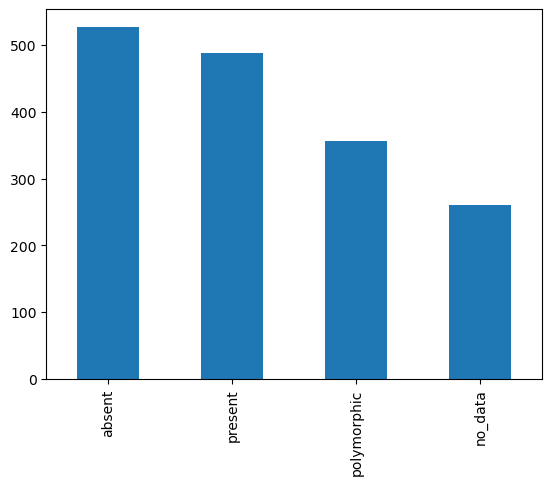

In [24]:
## create a plot representation
example_res['combination'].value_counts().plot.bar()

### Inspect regions around repeats

Sometimes, at the left and right side of the transposon, there is a repeat.

Which are the most common ones?

In [25]:
# get the summary of the elements in the left_repeat column
example_res['left_repeat'].value_counts()

DNAREP1_DSim      48
(TA)n             17
A-rich            15
DNAREP1_DM        13
Gypsy-1_DSim-I    12
                  ..
(ACTTT)n           1
LSU-rRNA_Dme       1
(AAGAACA)n         1
G5_DM              1
Gypsy-3_DSe-I      1
Name: left_repeat, Length: 237, dtype: int64

In [26]:
# get the summary of the elements in the right_repeat column
example_res['right_repeat'].value_counts()

DNAREP1_DSim      50
DNAREP1_DM        18
DNAREP1_DYak      13
A-rich            11
(TA)n              9
                  ..
(AAGAACA)n         1
Gypsy21-I_Dpse     1
hAT-2_DSe          1
(TTATCA)n          1
Gypsy-17_DTa-I     1
Name: right_repeat, Length: 202, dtype: int64

In [27]:
# get the summary of the elements in the right_repeat column
example_res['polyAT_right'].value_counts()

poly(A)4     15
poly(A)5      6
poly(A)6      4
poly(A)7      3
poly(A)15     1
poly(A)13     1
poly(A)12     1
poly(A)8      1
poly(A)17     1
poly(A)10     1
poly(A)9      1
Name: polyAT_right, dtype: int64

## Analyze some of the results analyzed within the CodeFly Project

Accompanying this python jupyter notebook there is a file named as all_results.tsv that contains the results for several different SRA samples.

In [28]:
example_res_all = pd.read_csv("all_results.tsv", sep="\t")

In [29]:
example_res_all.shape

(163100, 20)

In [30]:
example_res_all.head()

,strain,TE,absence_detection,presence_detection,combination,read_number_absence,left_match_length,left_match_id,polyAT_left,left_coverage,left_repeat,left_read_number_presence,left_filtered_read_number_presence,right_match_length,right_match_id,polyAT_right,right_coverage,right_repeat,right_read_number_presence,right_filtered_read_number_presence
0,SRR202074,FBti0020016,absent,absent,absent,8.0,11,100.00(0/11),NaN,7.50,(CA)n,0,0,-3,0(0/0),NaN,5.66,NaN,0,0
1,SRR202074,FBti0019166,absent,absent,absent,5.0,-1,0(0/0),NaN,3.93,NaN,0,0,-1,0(0/0),NaN,6.27,NaN,0,0
2,SRR202074,FBti0063276,NaN,present,polymorphic,NaN,60,100.00(0/60),NaN,14.60,DNAREP1_DSim,10,10,60,98.33(1/60),NaN,15.24,NaN,9,9
3,SRR202074,FBti0019123,absent,absent,absent,5.0,-2,0(0/0),NaN,1.74,NaN,0,0,-30,0(0/0),NaN,0.00,A-rich,0,0
4,SRR202074,FBti0060479,present,present,present,0.0,60,100.00(0/60),NaN,22.28,NaN,9,9,60,98.33(1/60),NaN,17.75,NaN,11,11


In [31]:
example_res_all.tail()

,strain,TE,absence_detection,presence_detection,combination,read_number_absence,left_match_length,left_match_id,polyAT_left,left_coverage,left_repeat,left_read_number_presence,left_filtered_read_number_presence,right_match_length,right_match_id,polyAT_right,right_coverage,right_repeat,right_read_number_presence,right_filtered_read_number_presence
163095,SRR2033170,FBti0019157,absent,present,polymorphic,15.0,60,100.00(0/60),NaN,22.36,NaN,4,4,60,100.00(0/60),NaN,39.70,NaN,14,14
163096,SRR2033170,FBti0064286,NaN,present,polymorphic,NaN,60,93.33(4/60),NaN,31.21,CR1-2_DRh,10,10,60,98.33(1/60),NaN,44.79,hAT-N1_DF,30,30
163097,SRR2033170,FBti0020055,present,present,present,0.0,60,100.00(0/60),NaN,50.76,NaN,19,19,60,100.00(0/60),NaN,20.73,NaN,17,17
163098,SRR2033170,FBti0019594,present,present,present,0.0,60,100.00(0/60),NaN,76.76,NaN,53,53,60,100.00(0/60),NaN,44.50,NaN,23,23
163099,SRR2033170,FBti0019364,absent,present,polymorphic,20.0,60,100.00(0/60),NaN,14.14,NaN,2,2,60,100.00(0/60),NaN,30.88,NaN,15,15


We can get unique values for column strain, this should be the 100 samples included


In [32]:
## get unique values for column strain
set(example_res_all.strain)

{'SRR202074',
 'SRR202075',
 'SRR202076',
 'SRR202077',
 'SRR202078',
 'SRR202079',
 'SRR202080',
 'SRR202081',
 'SRR202082',
 'SRR202083',
 'SRR202085',
 'SRR202089',
 'SRR202093',
 'SRR202094',
 'SRR202095',
 'SRR202099',
 'SRR202100',
 'SRR202112',
 'SRR202123',
 'SRR202124',
 'SRR202125',
 'SRR202126',
 'SRR202127',
 'SRR202128',
 'SRR202129',
 'SRR203064',
 'SRR203067',
 'SRR203068',
 'SRR203069',
 'SRR203226',
 'SRR203227',
 'SRR203228',
 'SRR203229',
 'SRR203230',
 'SRR203231',
 'SRR203232',
 'SRR203233',
 'SRR203234',
 'SRR203235',
 'SRR203236',
 'SRR203237',
 'SRR203238',
 'SRR2033112',
 'SRR2033113',
 'SRR2033114',
 'SRR2033115',
 'SRR2033116',
 'SRR2033117',
 'SRR2033118',
 'SRR2033119',
 'SRR2033120',
 'SRR2033121',
 'SRR2033122',
 'SRR2033123',
 'SRR2033124',
 'SRR2033126',
 'SRR2033127',
 'SRR2033128',
 'SRR2033129',
 'SRR2033130',
 'SRR2033131',
 'SRR2033132',
 'SRR2033133',
 'SRR2033134',
 'SRR2033135',
 'SRR2033136',
 'SRR2033137',
 'SRR2033138',
 'SRR2033139',
 'SRR20

We can get the values for all samples and an example transposon


In [33]:
## subset the dataframe with a given value for a column: TE=FBti0063675
example_res_all[example_res_all['TE']=='FBti0063675']

,strain,TE,absence_detection,presence_detection,combination,read_number_absence,left_match_length,left_match_id,polyAT_left,left_coverage,left_repeat,left_read_number_presence,left_filtered_read_number_presence,right_match_length,right_match_id,polyAT_right,right_coverage,right_repeat,right_read_number_presence,right_filtered_read_number_presence
1038,SRR202074,FBti0063675,no_data,present,no_data,0.0,60,96.67(2/60),NaN,3.77,NaN,3,3,60,93.33(4/60),NaN,8.10,NaN,2,2
1940,SRR202075,FBti0063675,present,present,present,0.0,60,100.00(0/60),NaN,24.80,NaN,14,14,60,100.00(0/60),NaN,21.81,NaN,18,18
4869,SRR202076,FBti0063675,no_data,present,no_data,0.0,60,96.67(2/60),NaN,5.67,NaN,7,7,60,95.00(3/60),NaN,10.11,NaN,8,8
5854,SRR202077,FBti0063675,no_data,present,no_data,0.0,60,96.67(2/60),NaN,2.22,NaN,2,2,60,95.00(3/60),NaN,3.87,NaN,4,4
8152,SRR202078,FBti0063675,present,present,present,0.0,60,96.67(2/60),NaN,9.01,NaN,6,6,60,96.67(2/60),NaN,5.23,NaN,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155395,SRR2033166,FBti0063675,present,present,present,0.0,60,100.00(0/60),NaN,48.52,NaN,41,41,60,100.00(0/60),NaN,45.61,NaN,15,15
157426,SRR2033167,FBti0063675,present,present,present,0.0,60,100.00(0/60),NaN,24.38,NaN,21,21,60,100.00(0/60),NaN,19.17,NaN,7,7
158456,SRR2033168,FBti0063675,present,present,present,0.0,60,100.00(0/60),NaN,50.55,NaN,36,36,60,100.00(0/60),NaN,46.84,NaN,19,19
161378,SRR2033169,FBti0063675,present,present,present,0.0,60,100.00(0/60),NaN,33.36,NaN,26,26,60,100.00(0/60),NaN,31.04,NaN,8,8


We can produce some summary results for the samples

In [34]:
## count values for each level in the combination column
example_res_all['combination'].value_counts()

polymorphic    68556
present        57721
absent         26508
no_data        10315
Name: combination, dtype: int64

By doing the previous code, we are obtaining the summary of all values for all samples, but we might be interested in obtaining grouped by each sample

In [35]:
## Group by sample and count the combination levels: absent, no_data, polymorphic, present, absent
example_res_all.groupby(['strain', 'combination'])['combination'].agg(['count'])

count
strain     combination       
SRR202074  absent         541
           no_data        230
           polymorphic    362
           present        498
SRR202075  absent         556
...                       ...
SRR2033169 present        631
SRR2033170 absent          55
           no_data         16
           polymorphic    938
           present        622

[400 rows x 1 columns]

In [36]:
## unstack and pivot the table to better understand the results
summary_data = example_res_all.groupby(['strain', 'combination'])['combination'].agg(['count']).unstack()
summary_data

count                            
combination absent no_data polymorphic present
strain                                        
SRR202074      541     230         362     498
SRR202075      556     213         363     499
SRR202076      564     189         370     508
SRR202077      536     261         357     477
SRR202078      531     261         355     484
...            ...     ...         ...     ...
SRR2033166      55      18         939     619
SRR2033167      51      19         919     642
SRR2033168      54      19         929     629
SRR2033169      53      18         929     631
SRR2033170      55      16         938     622

[100 rows x 4 columns]

We are going to create a plot for all samples, one in each column and the stacked values of the different levels of combination parameters


<AxesSubplot:xlabel='strain'>

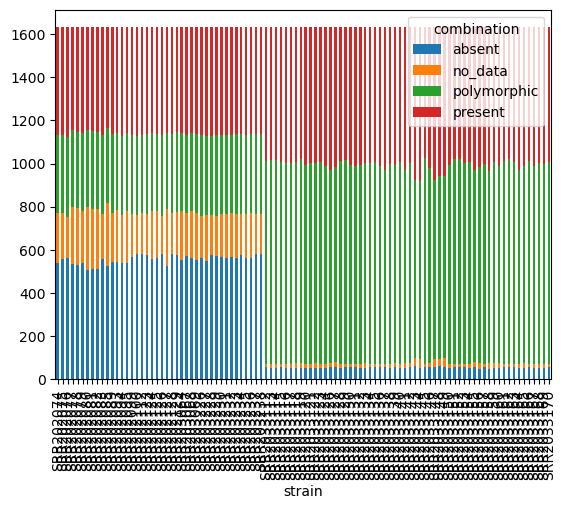

In [37]:
## plot the results of the combination column group by strain and summarized
example_res_all.groupby('strain')['combination'].value_counts().unstack().plot.bar(stacked=True)

### Inspect a set of particular transposons of interest

Are FBti0019627, FBti0019985 & FBti0019386 present in any of the samples? Which one is the most frequent one?

In [38]:
## subset the dataframe with a given value for a column: TE=FBti0063675
subset_df = example_res_all[example_res_all['TE'].isin(['FBti0019627', 'FBti0019985', 'FBti0019386'])]
subset_df

,strain,TE,absence_detection,presence_detection,combination,read_number_absence,left_match_length,left_match_id,polyAT_left,left_coverage,left_repeat,left_read_number_presence,left_filtered_read_number_presence,right_match_length,right_match_id,polyAT_right,right_coverage,right_repeat,right_read_number_presence,right_filtered_read_number_presence
423,SRR202074,FBti0019386,absent,absent,absent,13.0,60,100.00(0/60),NaN,4.02,NaN,0,0,-30,0(0/0),NaN,1.29,NaN,0,0
1071,SRR202074,FBti0019627,absent,absent,absent,27.0,-22,0(0/0),NaN,4.73,NaN,0,0,-10,0(0/0),NaN,5.34,NaN,0,0
1364,SRR202074,FBti0019985,present,no_data,no_data,0.0,-30,0(0/0),NaN,0.76,NaN,0,0,-30,0(0/0),NaN,1.39,NaN,0,0
1769,SRR202075,FBti0019985,absent,absent,absent,21.0,1,100.00(0/1),NaN,11.25,NaN,0,0,-21,0(0/0),NaN,7.51,NaN,0,0
2342,SRR202075,FBti0019386,absent,absent,absent,14.0,0,0(0/0),NaN,10.33,NaN,0,0,-2,0(0/0),NaN,2.07,NaN,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160101,SRR2033169,FBti0019985,absent,present,polymorphic,13.0,60,100.00(0/60),NaN,22.83,NaN,12,12,60,100.00(0/60),NaN,28.74,NaN,14,14
160976,SRR2033169,FBti0019627,absent,present,polymorphic,10.0,60,100.00(0/60),NaN,26.34,NaN,11,11,60,100.00(0/60),NaN,23.62,NaN,9,9
161609,SRR2033170,FBti0019985,absent,present,polymorphic,21.0,60,100.00(0/60),NaN,32.95,NaN,23,23,60,100.00(0/60),NaN,45.42,NaN,19,19
162080,SRR2033170,FBti0019627,absent,present,polymorphic,20.0,60,100.00(0/60),NaN,47.83,NaN,22,22,60,100.00(0/60),NaN,39.69,NaN,13,13


In [39]:
## unstack and pivot the table to better understand the results
subset_df.pivot_table(index='TE', columns='combination', values='strain', aggfunc='count', fill_value=0)

combination,absent,no_data,polymorphic,present
TE,,,,
FBti0019386,40,1,20,39
FBti0019627,42,0,38,20
FBti0019985,26,15,59,0


<AxesSubplot:xlabel='TE'>

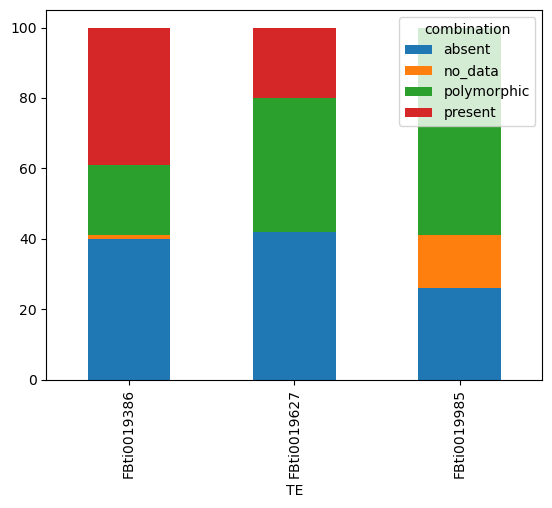

In [40]:
## unstack and pivot the table to better understand the results
subset_df.pivot_table(index='TE', columns='combination', values='strain', aggfunc='count', fill_value=0).plot.bar(stacked=True)